In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(16)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = 'diabetes.csv'
df = pd.read_csv(filename)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
# 상위 5개 데이터를 출력한다
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


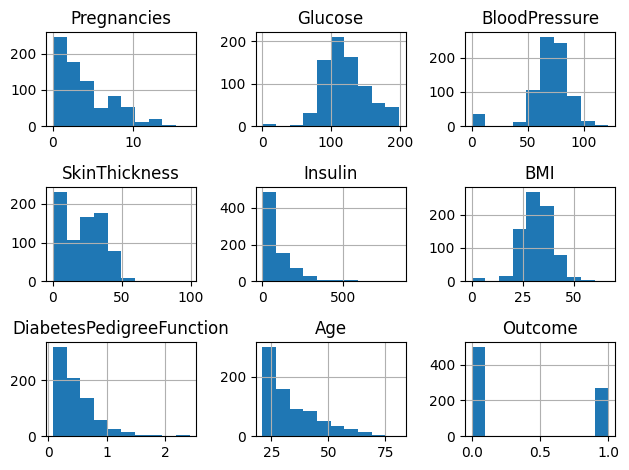

In [5]:
# 히스토그램을 살펴본다
df.hist()
plt.tight_layout()
plt.show()

pregnancies는 진짜 0일수 있는데 인슐린이나 혈압이 0인건 이상 -> Null 을 0을로 대치했음

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [9]:
def preprocess(df):
    print('----------------------------------------------')
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # 0이 아닌 값의 평균을 계산해 0 값을 대체: 평균대치 (임신 횟수는 빠짐)
    df['Glucose'] = df['Glucose'].replace(0, np.nan)
    df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
    df['Insulin'] = df['Insulin'].replace(0, np.nan)
    df['BMI'] = df['BMI'].replace(0, np.nan)
    df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
    df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

    print('----------------------------------------------')
    print("After preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # 데이터 표준화: z스코어 정규화
    df_scaled = preprocessing.scale(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled['Outcome'] = df['Outcome']
    df = df_scaled


    return df


In [10]:
# 데이터 전처리 및 특징 공학 수행
df = preprocess(df)

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


In [11]:
# 데이터를 훈련 데이터셋과 테스트 데이터셋으로 분할
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# 케라스 신경망을 구축
model = Sequential() #한방향으로 나가니까 사용
model.add(Dense(16, activation='relu', input_dim=8)) #첫 은닉층
model.add(Dense(8, activation='relu'))  #2번째 은닉층
model.add(Dense(1, activation='sigmoid')) #시그모이드: 0부터 1사이의 확률로 나옴
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #동작할때 고려할사항 지정
model.fit(X_train, y_train, epochs=50, batch_size=20) #epoch가 실행 횟수, batch_size: 1회 학습 시킬때 20개만 랜덤으로 뽑아서 학습
#학습률은 디폴트 0.001

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6422 - loss: 0.6732
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6535 - loss: 0.6619
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.6328
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5836
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.5522
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.5251
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - loss: 0.5148
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.5015
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7514 - loss: 0.5009
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.4925
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.5035
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.5049


In [13]:
# 결과 - 정확도
scores = model.evaluate(X_train, y_train, verbose=False) #confusion matrix 나옴
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 80.45%

Testing Accuracy: 77.06%



In [14]:
model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[0.65253377],
       [0.20223045],
       [0.0036567 ],
       [0.4648212 ],
       [0.03720644],
       [0.8335593 ],
       [0.18129528],
       [0.05034996],
       [0.09109057],
       [0.02362466],
       [0.19222641],
       [0.41516063],
       [0.77265006],
       [0.75618404],
       [0.36617538],
       [0.3915205 ],
       [0.76337683],
       [0.03483403],
       [0.03426973],
       [0.18716353],
       [0.0063158 ],
       [0.5682834 ],
       [0.30293405],
       [0.02996221],
       [0.12435795],
       [0.00785887],
       [0.8833242 ],
       [0.04435785],
       [0.03277081],
       [0.06512558],
       [0.0324418 ],
       [0.16784254],
       [0.10545716],
       [0.04304449],
       [0.5037594 ],
       [0.02529487],
       [0.0222445 ],
       [0.84501594],
       [0.47046125],
       [0.0715758 ],
       [0.40430376],
       [0.6764375 ],
       [0.09860931],
       [0.39950785],
       [0.01514492],
       [0.19430906],
       [0.41832864],
       [0.106

In [15]:
# 케라스 신경망을 구축
model1 = Sequential() #새 모델 만들기
model1.add(Dense(32, activation='relu', input_dim=8))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2) #validation으로 나누고 테스트

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6767 - loss: 0.6482 - val_accuracy: 0.7222 - val_loss: 0.6025
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7417 - loss: 0.5807 - val_accuracy: 0.7130 - val_loss: 0.5472
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7554 - loss: 0.5436 - val_accuracy: 0.7222 - val_loss: 0.5174
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7489 - loss: 0.5350 - val_accuracy: 0.7315 - val_loss: 0.5014
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7637 - loss: 0.4999 - val_accuracy: 0.7407 - val_loss: 0.4879
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7739 - loss: 0.4760 - val_accuracy: 0.7407 - val_loss: 0.4764
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7548 - loss: 0.4634 - val_accuracy: 0.7593 - val_loss: 0.4694
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7737 - loss: 0.4839 - val_accuracy: 0.7593 - val_loss: 0.4652
E

In [16]:
# 결과 - 정확도
scores = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
#overfitting: training은 잘 맞추는데 testing은 못맞춤

Training Accuracy: 80.82%

Testing Accuracy: 78.35%



In [18]:
from tensorflow.keras.regularizers import l1

# 케라스 신경망을 구축
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=8, kernel_regularizer=l1(0.001))) #조금만 규제
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4664 - loss: 0.7685 - val_accuracy: 0.5556 - val_loss: 0.7526
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6566 - loss: 0.6969 - val_accuracy: 0.6852 - val_loss: 0.6954
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7166 - loss: 0.6696 - val_accuracy: 0.7315 - val_loss: 0.6505
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7261 - loss: 0.6297 - val_accuracy: 0.7407 - val_loss: 0.6154
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7886 - loss: 0.5730 - val_accuracy: 0.7407 - val_loss: 0.5924
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7610 - loss: 0.5682 - val_accuracy: 0.7500 - val_loss: 0.5773
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7606 - loss: 0.5602 - val_accuracy: 0.7500 - val_loss: 0.5645
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7566 - loss: 0.5878 - val_accuracy: 0.7593 - val_loss: 0.5571
Ep

In [19]:
# 결과 - 정확도
scores = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
#overfitting 잡는 효과


Training Accuracy: 79.89%

Testing Accuracy: 77.92%



In [20]:
from tensorflow.keras.regularizers import l2

# 케라스 신경망을 구축
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=8, kernel_regularizer=l2(0.001)))
model1.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6301 - loss: 0.7134 - val_accuracy: 0.6944 - val_loss: 0.6517
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7040 - loss: 0.6336 - val_accuracy: 0.7130 - val_loss: 0.6011
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7190 - loss: 0.5999 - val_accuracy: 0.7407 - val_loss: 0.5661
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7353 - loss: 0.5719 - val_accuracy: 0.7778 - val_loss: 0.5383
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7449 - loss: 0.5522 - val_accuracy: 0.7778 - val_loss: 0.5190
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7463 - loss: 0.5398 - val_accuracy: 0.7685 - val_loss: 0.5075
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7644 - loss: 0.5234 - val_accuracy: 0.8056 - val_loss: 0.4973
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7692 - loss: 0.4822 - val_accuracy: 0.7963 - val_loss: 0.4903

In [21]:
# 결과 - 정확도
scores = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 78.96%

Testing Accuracy: 77.06%



L1을 불필요한 변수를 없애고 L2는 조금이라도 남겨놓는다

In [22]:
model1.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.6353658 ],
       [0.10271697],
       [0.00234948],
       [0.37555966],
       [0.04537687],
       [0.87150353],
       [0.31489402],
       [0.1300246 ],
       [0.09447383],
       [0.03286577],
       [0.21907207],
       [0.5747635 ],
       [0.80006206],
       [0.731394  ],
       [0.34350964],
       [0.34470552],
       [0.7736421 ],
       [0.05630196],
       [0.06832868],
       [0.25536057],
       [0.005774  ],
       [0.47695875],
       [0.44327575],
       [0.0419543 ],
       [0.16030332],
       [0.01225788],
       [0.81856954],
       [0.02757809],
       [0.05177787],
       [0.07830458],
       [0.07230856],
       [0.13634537],
       [0.16908155],
       [0.03498478],
       [0.46274912],
       [0.02911624],
       [0.01087706],
       [0.7497181 ],
       [0.54040056],
       [0.06859159],
       [0.39132342],
       [0.7633916 ],
       [0.13120578],
       [0.4298537 ],
       [0.01519355],
       [0.15365161],
       [0.5897179 ],
       [0.155

In [ ]:
# 결과 - 정확도
scores = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 81.01%

Testing Accuracy: 78.79%



In [23]:
from tensorflow.keras.layers import Dense, Dropout

# 케라스 신경망을 구축
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dropout(0.5)) #다음 노드로 갈때 정보를 반만 보낸다
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5)) #다음 노드로 갈때 정보를 반만 보낸다
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=20)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5225 - loss: 0.7267
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.6675
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6487 - loss: 0.6258
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5863 - loss: 0.6495
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5758
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.5933
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.5801
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6380 - loss: 0.6046
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5664
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5834
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.6132
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5333


In [24]:
# 결과 - 정확도
scores = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
#큰 차이는 없다

Training Accuracy: 78.96%

Testing Accuracy: 77.06%



In [25]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR = './model/' #디렉토리 하나 만들기
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.keras" #모델 이름(사실 중요하진 않음)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) #val_loss를 모니터링: loss가 떨어질수록 학습이 잘됨

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30) #30정도까지는 기다려봐라
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])
#중간에 학습하다가 좋은 모델이 있으면 stop, 너무 일찍 끝는 문제가 발생할수도


Epoch 1: val_loss improved from inf to 0.43875, saving model to ./model/01-0.4388.keras

Epoch 2: val_loss improved from 0.43875 to 0.43732, saving model to ./model/02-0.4373.keras

Epoch 3: val_loss did not improve from 0.43732

Epoch 4: val_loss improved from 0.43732 to 0.43637, saving model to ./model/04-0.4364.keras

Epoch 5: val_loss improved from 0.43637 to 0.43505, saving model to ./model/05-0.4350.keras

Epoch 6: val_loss improved from 0.43505 to 0.43468, saving model to ./model/06-0.4347.keras

Epoch 7: val_loss did not improve from 0.43468

Epoch 8: val_loss did not improve from 0.43468

Epoch 9: val_loss improved from 0.43468 to 0.43376, saving model to ./model/09-0.4338.keras

Epoch 10: val_loss did not improve from 0.43376

Epoch 11: val_loss did not improve from 0.43376

Epoch 12: val_loss did not improve from 0.43376

Epoch 13: val_loss did not improve from 0.43376

Epoch 14: val_loss did not improve from 0.43376

Epoch 15: val_loss improved from 0.43376 to 0.43250, sav

In [26]:
# 결과 - 정확도
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 78.58%

Testing Accuracy: 77.06%



In [27]:
print(scores)

[0.42964404821395874, 0.7705627679824829]


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


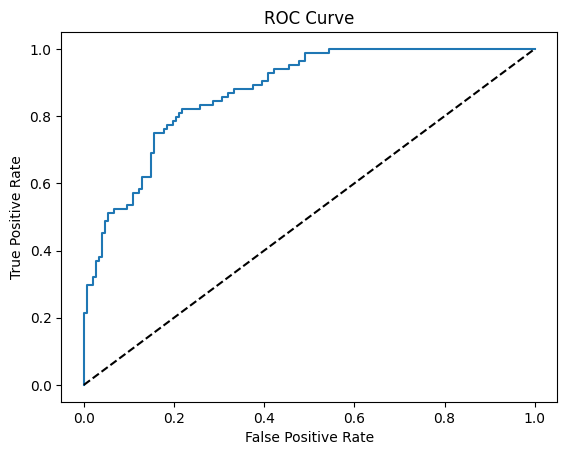

<Figure size 640x480 with 0 Axes>

In [28]:
# 결과 - ROC 곡선
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [29]:
# prompt: ROC AUC 값 출력

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_test_pred_probs)
print('ROC AUC: %.3f' % roc_auc)


ROC AUC: 0.874


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[128  19]
 [ 34  50]]


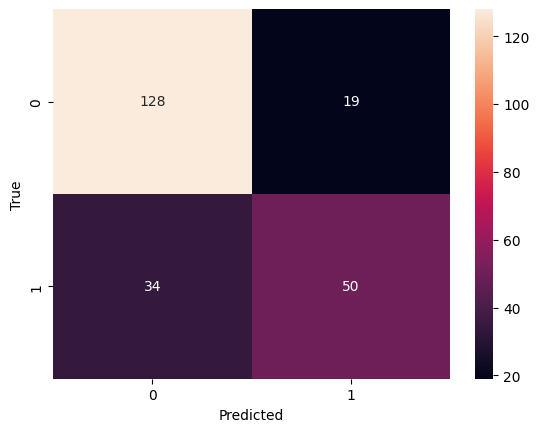

In [30]:
# prompt: confusion matrix 출력

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
# prompt: classification report 출력

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       147
           1       0.72      0.60      0.65        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [32]:
# prompt: 현재 모델 저장

model.save('my_model.keras')


In [33]:
new_model = load_model('/content/my_model.keras')
#모델 저장하고 연결해서 쓸수 있다

이 뒤는 참고할 것

In [34]:
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
#SVM
model_SVM = svm.SVC(gamma='scale')
model_SVM.fit(X_train, y_train)

y_pred = model_SVM.predict(X_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM: 77.06


In [36]:
#DecisionTree
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

y_pred = model_DT.predict(X_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 68.83


In [37]:
#Random Forest
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

RandomForestClassifier: 74.46


In [38]:
features = pd.Series(
    model_RF.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(features)

Glucose                     0.239486
BMI                         0.177182
DiabetesPedigreeFunction    0.134597
Age                         0.116378
Insulin                     0.092689
BloodPressure               0.084606
SkinThickness               0.084026
Pregnancies                 0.071037
dtype: float64
